# Traditional Machine Learning and Deep Learning

Author: Allmin Susaiyah

Name of student: <fill your name>

In this notebook, various machine learning operations of python are covered. shift + Enter will excecute each cell

# Simple ML Example

In [37]:
import numpy as np
X = np.array([[6000], [4000], [4500], [4230], [2227]]) #training
y = np.array([15000, 23241, 43000, 9990, 69900])

from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X, y) 
coef = clf.coef_
print(coef)


[-13.90222634]


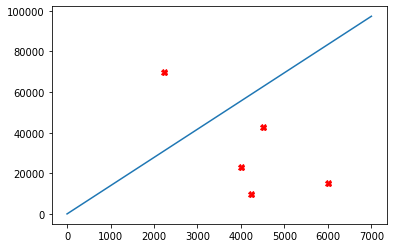

In [38]:
import matplotlib.pyplot as plt

plt.plot()

x_axis = np.linspace(0, 7000)
y_axis = [(0- coef[0]*x) for x in x_axis]
plt.plot(x_axis,y_axis)

plt.plot(X,y, 'rX')

In [54]:
X_ = np.array([[1150], [5000]]) #validation
y_ = np.array([3499, 12447])
y_predicted = clf.predict(X_)
print(type(y_))
print(y_predicted, y_)

from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(y_, y_predicted)
print('error:',error)

<class 'numpy.ndarray'>
[74508.43120535 20984.85977752] [ 3499 12447]
error: 39773.64549143447


In [55]:
print(clf.predict([[2815]])) #deployment
print(clf.predict([[4300]]))


[51361.22434111]
[30716.41821895]


# Problem varying performance

[-4.40384078]
<class 'numpy.ndarray'>
[36571.81145251 31828.87493017] [ 3499 69900]
error: 35571.968261173184
[29239.41655028]
[22699.71298883]


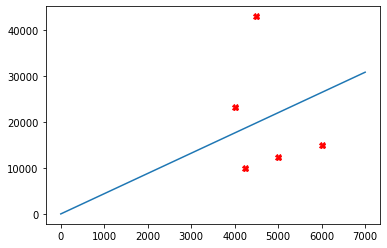

In [57]:

X = np.array([[6000], [4000], [4500], [4230], [5000]]) #training
y = np.array([15000, 23241, 43000, 9990, 12447])

clf = LinearRegression()
clf.fit(X, y) 
coef = clf.coef_
print(coef)
plt.plot()

x_axis = np.linspace(0, 7000)
y_axis = [(0- coef[0]*x) for x in x_axis]
plt.plot(x_axis,y_axis)

plt.plot(X,y, 'rX')
X_ = np.array([[1150], [2227]]) #validation
y_ = np.array([3499, 69900])
y_predicted = clf.predict(X_)
print(type(y_))
print(y_predicted, y_)


error = mean_absolute_error(y_, y_predicted)
print('error:',error)
print(clf.predict([[2815]])) #deployment
print(clf.predict([[4300]]))

# Practical Example
download data from: https://data.mendeley.com/datasets/7dybx7wyfn/3
extract such that c:/mlworkshop has the folder 'C:/mlworkshopECG signals (1000 fragments)/MLII'

In [69]:
#import libraries
import os
%matplotlib inline
import numpy as np
from scipy import signal
from scipy.io import loadmat
from scipy.fftpack import fft

In [70]:
# defining data folders and extraction
# here we are taking ecg signals of two classes : NSR and AFL
# our aim is to classify these signals into respective classes

SIGNAL_FOLDER_PATH = 'ECG signals (1000 fragments)'
C1_path = SIGNAL_FOLDER_PATH + '/MLII/1 NSR'
C2_path = SIGNAL_FOLDER_PATH + '/MLII/3 AFL'
from glob import glob
C1_list = glob(C1_path + '/*')
C2_list = glob(C2_path + '/*')


def norm1d(sig):
    sig=np.float32(sig)
    sig-=np.min(sig)
    sig/=np.max(sig)
    return(sig)

def get_fft_label_mat(mat_file):
    label = mat_file.strip(os.path.basename(mat_file))
    print(label)
    label = label.strip(os.path.sep)
    print(label)
    label = label.split('/')[-1]
    print(label)
    mat_dict = loadmat(mat_file)
    mat_signal = mat_dict['val']
    sig = norm1d(mat_signal[0])
    N = len(sig)
    fs = 360
    sig_fft = fft(sig)
    sig_fft = abs(sig_fft)[:N//2]
    return (sig_fft,label)

x,y = get_fft_label_mat(C2_list[0])
print(C2_list[0])
print(x)
print(y)
    

    
    

IndexError: list index out of range

In [ ]:
C1_list

In [ ]:
#fetching the data and printing
all_list = C1_list
[all_list.append(i) for i in C2_list]

for mat_file in all_list:
    x,y = get_fft_label_mat(mat_file)
    print(mat_file)
    print(x)
    print(y)

In [ ]:
#fetching the data, appending data to list and printing

X = []
Y = []

all_list = C1_list
[all_list.append(i) for i in C2_list]

for mat_file in all_list:
    x,y = get_fft_label_mat(mat_file)
    print(mat_file)
    X.append(x)
    Y.append(y)
    print(x)
    print(y)
X= np.array(X)
Y= np.array(Y)

In [ ]:
#display data size
X.shape, Y.shape

In [ ]:
# taking only first 100 fft coeffficients
X = X[:,:100]
X.shape

In [ ]:
#splitting data into train and test sets
# this helps in validating the model

from sklearn.model_selection import train_test_split
Xtrain, Xval, Ytrain, Yval = train_test_split(X,Y,test_size=0.25, random_state=42)


In [ ]:
# Importing classifier and training it

from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(1000, 4000, 256, 50), random_state=1)
clf.fit(Xtrain, Ytrain)   
#clf object is now a trained model

In [ ]:
#testing the trained classifier
Ypred = clf.predict(Xval)
print(Ypred)
print(Yval)

In [ ]:
#validating the predictions
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm = confusion_matrix(Yval,Ypred)
print(cm)
cr = classification_report(Yval,Ypred)
print(cr)
acs = accuracy_score(Yval, Ypred)
print(acs)

In [ ]:
#displaying the data and prediction and actual labels
import matplotlib.pyplot as plt
for (a,b,c) in zip(Xval,Yval,Ypred):
    plt.semilogy(a)
    plt.title("actual:{},predicted:{}".format(b,c))
    plt.show()
